In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

Reading CSV and setting timeseries as index

In [134]:
df=pd.read_csv('../data/df_cleaned_year.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)

/var/folders/dr/684wtygx16jdkrv3syzbcvg40000gn/T/ipykernel_91777/4228124792.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/df_cleaned_year.csv')


Method to plot dataframes

In [137]:
def plot_eda(df,title,save,ylabe="Station"):
    # Initialize the matplotlib figure   
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes("pastel")
    sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
    sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel(ylabe, fontsize = 16)
    ax.legend(fontsize = 16)
    # plt.subplots_adjust(bottom=0.15,left=0.3,right=3)

    plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")
    return f,ax;


Getting top and bottom ten station by passengers amount entries.

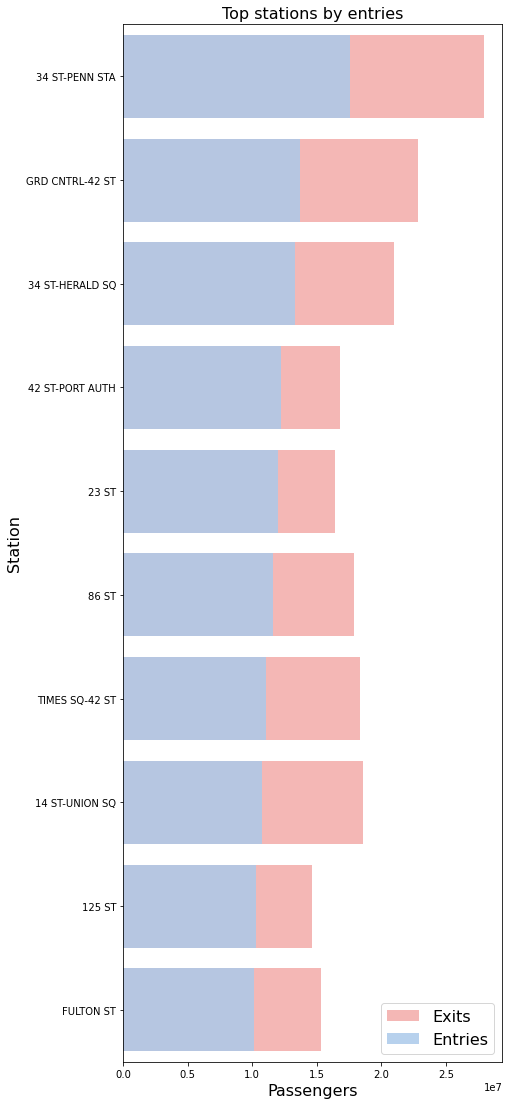

In [140]:
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_top,"Top stations by entries","entries_top");

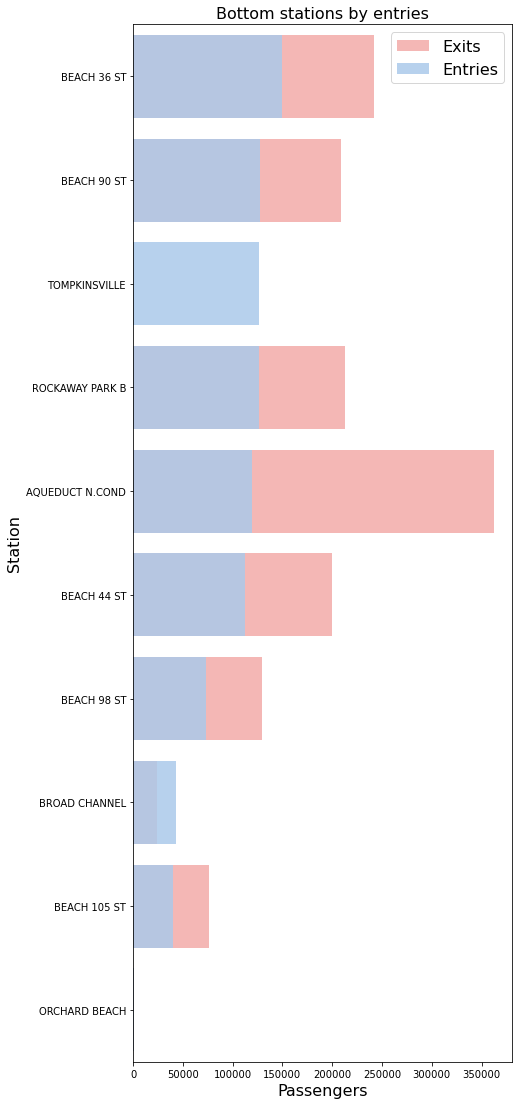

In [141]:
entries_bottom=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).tail(10)
plot_eda(entries_bottom,"Bottom stations by entries","entries_bottom");

Getting top and bottom ten station by passengers amount exits.

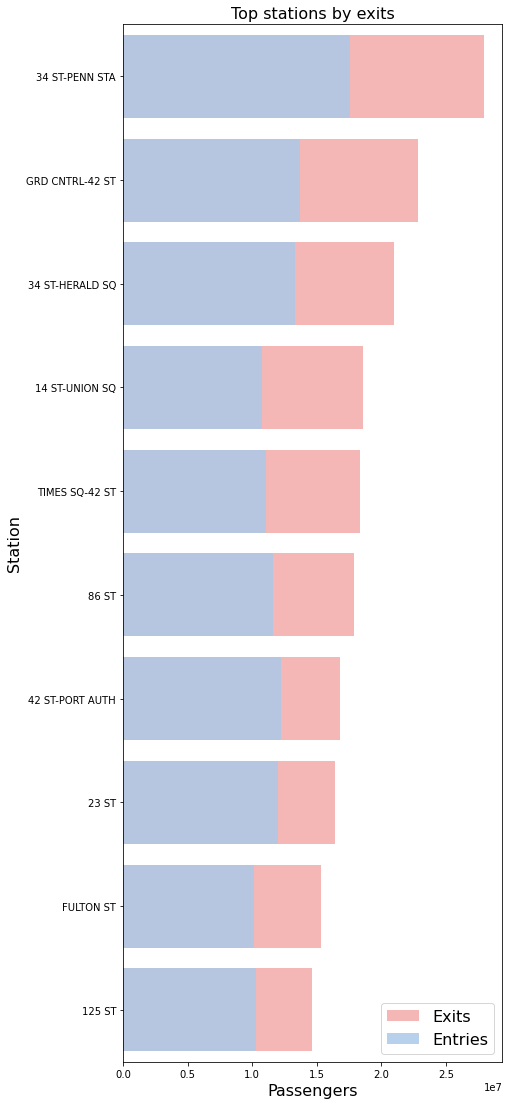

In [142]:
exits_top=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_top,"Top stations by exits","exits_top");

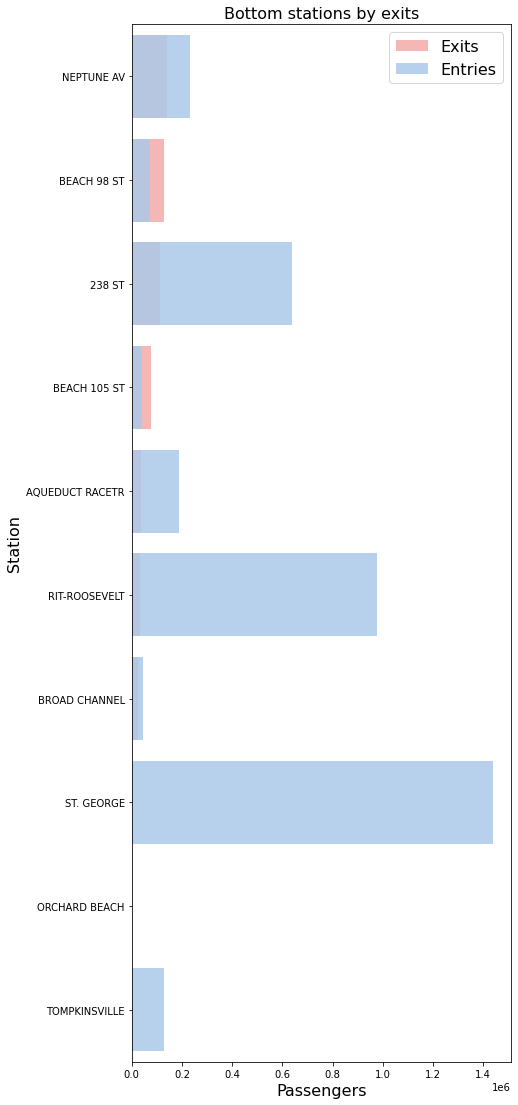

In [143]:
exits_bottom=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).tail(10)
plot_eda(exits_bottom,"Bottom stations by exits","exits_bottom");

In [144]:
df[df["station"]=="TOMPKINSVILLE"].head()

,stat_id,unit,scp,station,linename,entries_abs,exits_abs,weekday
datetime,,,,,,,,
2021-10-16 06:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,1,0,Saturday
2021-10-16 10:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,24,0,Saturday
2021-10-16 14:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,14,0,Saturday
2021-10-16 18:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,10,0,Saturday
2021-10-16 22:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,3,0,Saturday


Top mean amount of people per line daily.

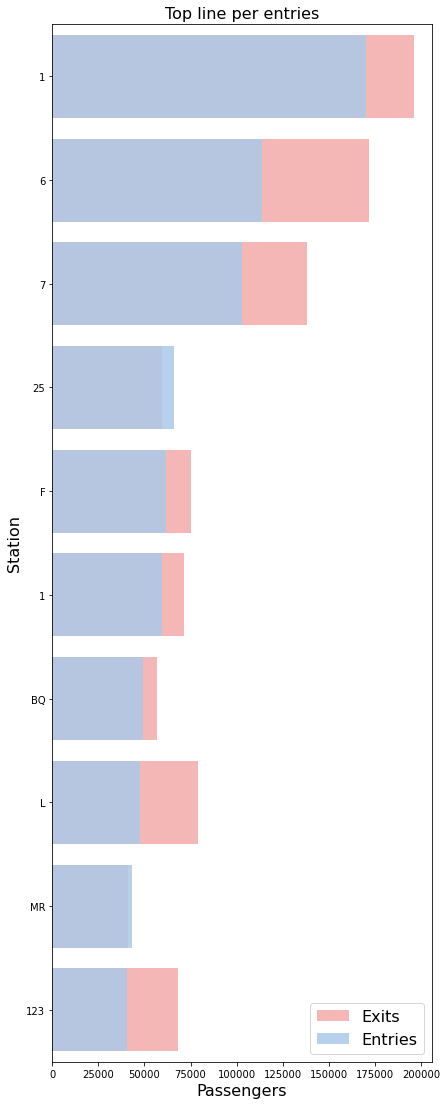

In [145]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_line,"Top line per entries","line_top");

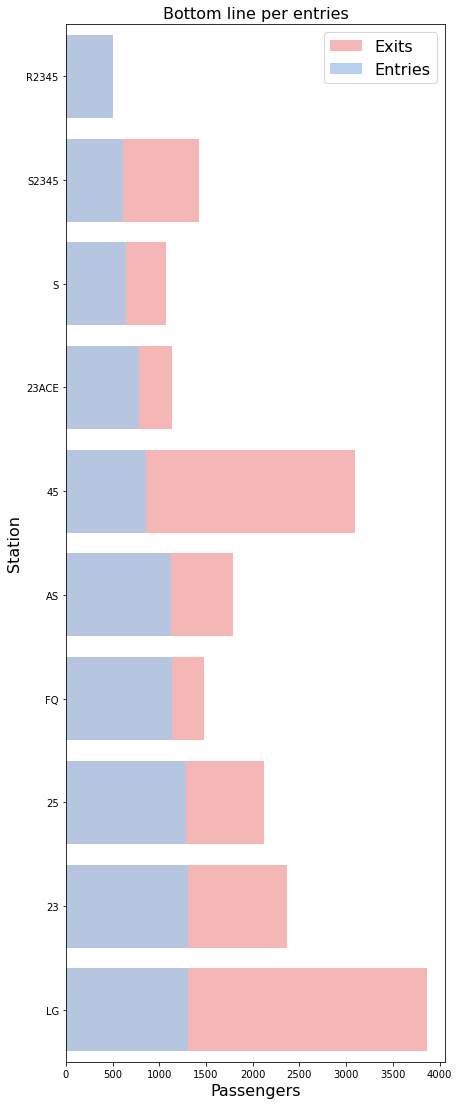

In [146]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=True).head(10)
plot_eda(entries_line,"Bottom line per entries","line_bottom");

Top mean amount of people per line daily

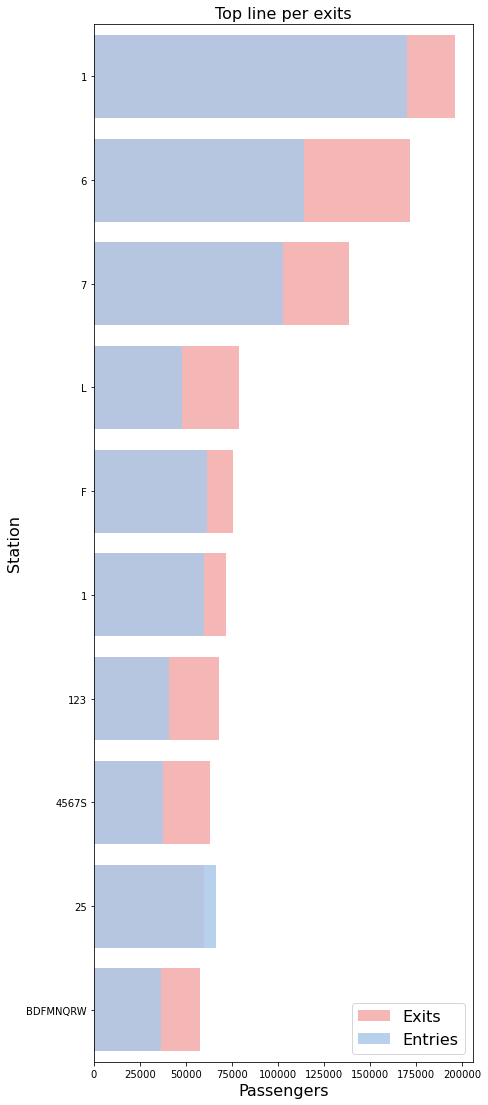

In [147]:
exits_line_top=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_line_top,"Top line per exits","line_top_exits");

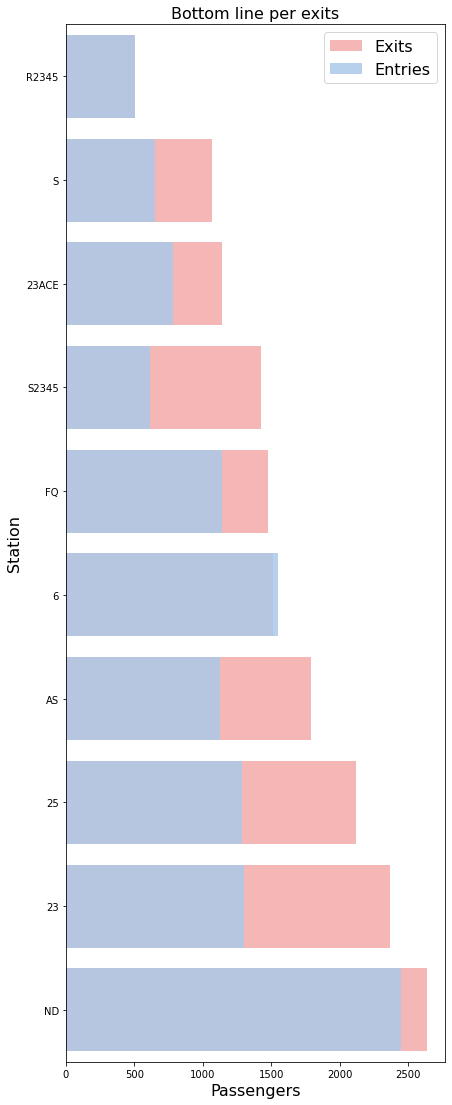

In [148]:
exits_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=True).head(10)
plot_eda(exits_line,"Bottom line per exits","line_bottom_exits");

Amount of people per day for the whole subway

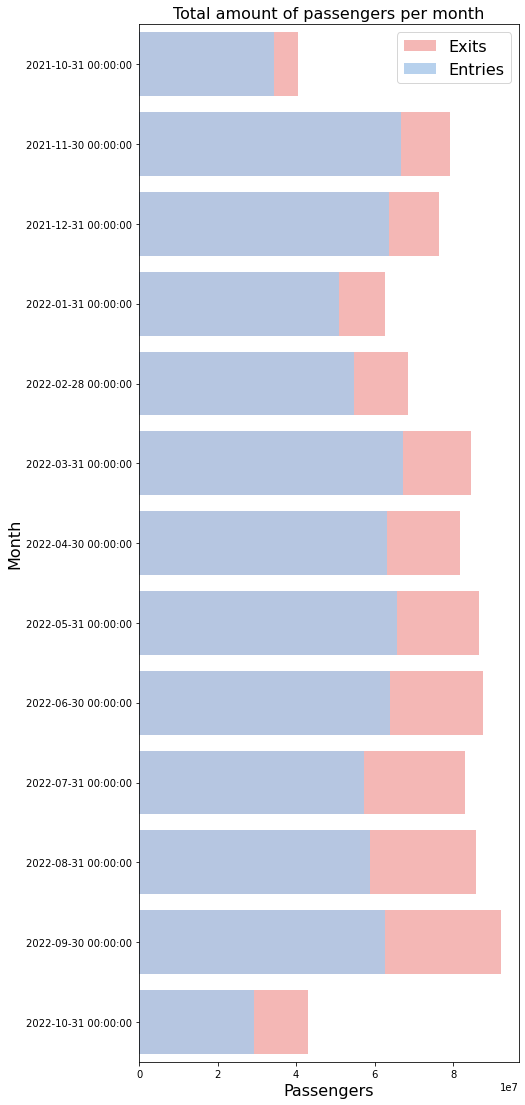

In [149]:
plot_eda(df.resample("M").sum().sort_index(),"Total amount of passengers per month","subway_amount","Month");


Subway load per weekday

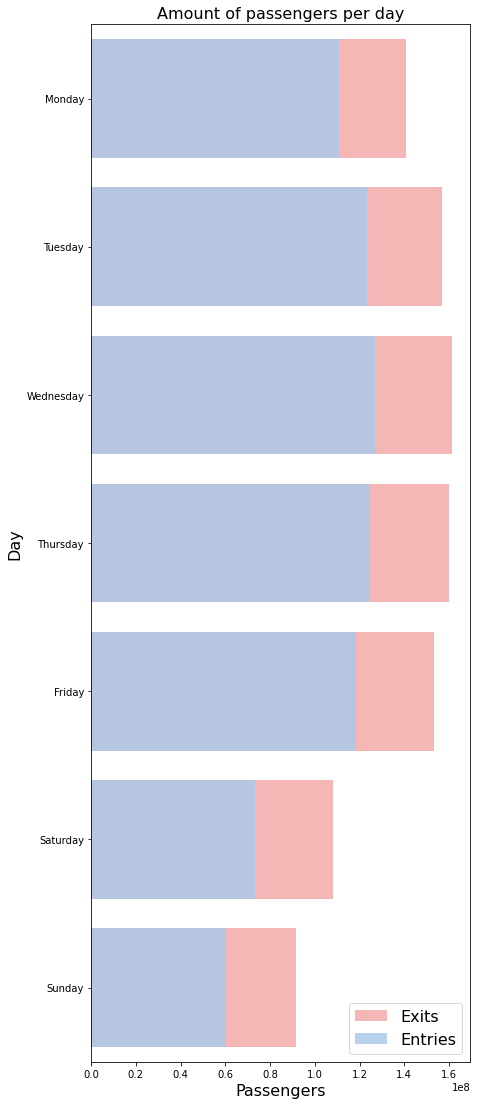

In [155]:
cats = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
by_day=df.groupby("weekday").sum().sort_index()
by_day['name_sort'] = by_day.index.map(cats)
plot_eda(by_day.sort_values(by="name_sort"),"Amount of passengers per day","Day_name","Day");

Total amount of entries annually

In [158]:
df["entries_abs"].sum()

738115615

Total amount of exits annually

In [159]:
df["exits_abs"].sum()

971819557

Annual NYC subway exits

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


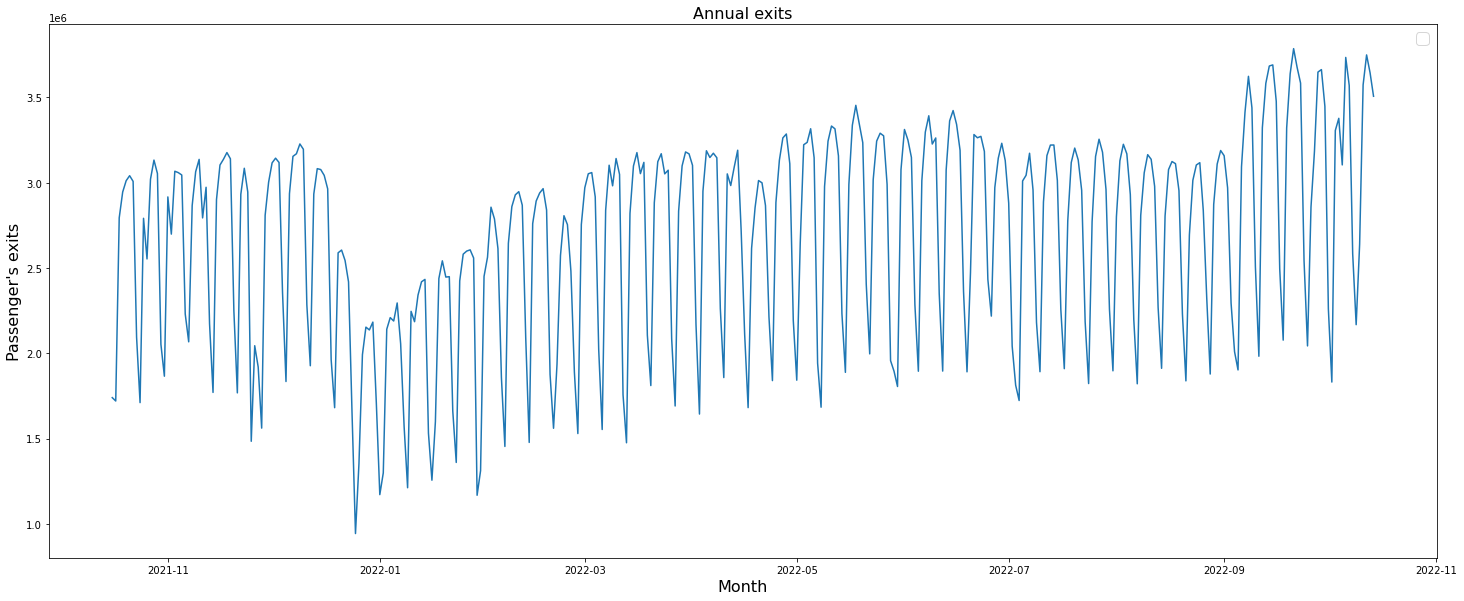

In [163]:
# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(20, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("d")).sum()["exits_abs"],ax=ax)
ax.set_title("Annual exits",fontsize=16)
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel("Passenger's exits", fontsize = 16)
ax.legend(fontsize = 16)
plt.savefig(f"../resources/annual_exits.jpg",bbox_inches="tight")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


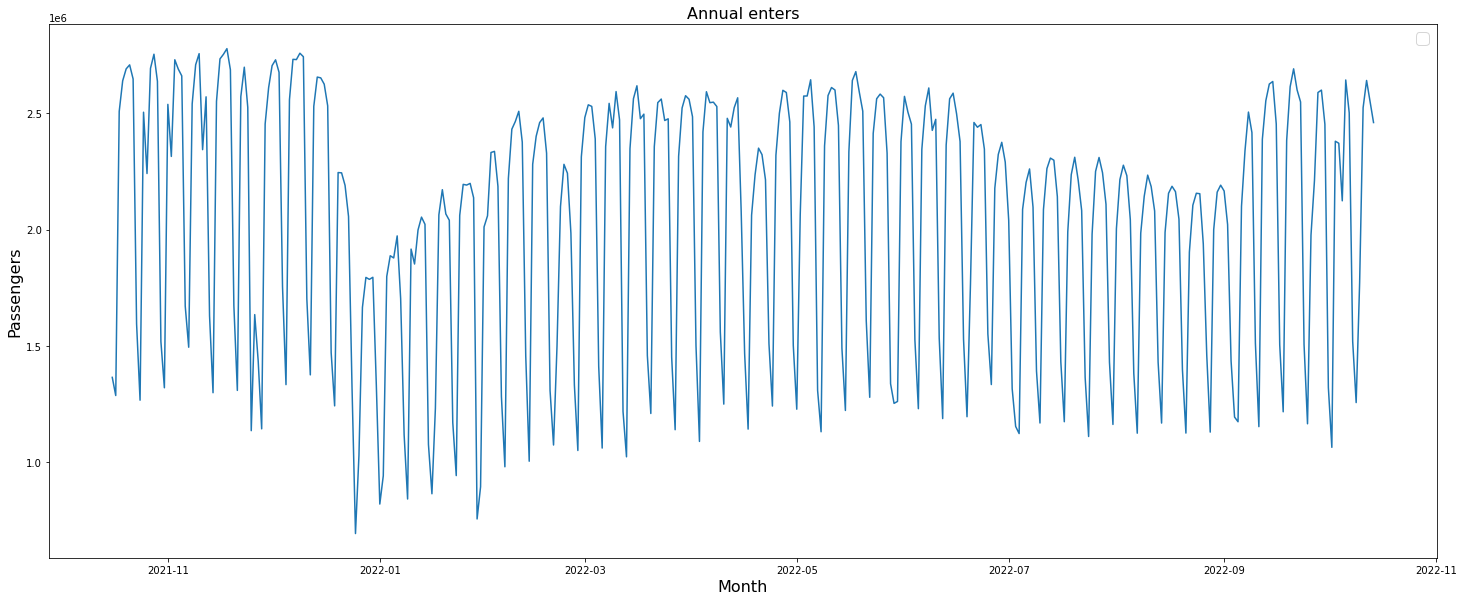

In [164]:
# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(20, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("d")).sum()["entries_abs"],ax=ax)
ax.set_title("Annual enters",fontsize=16)
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16);
plt.savefig(f"../resources/annual_entries.jpg",bbox_inches="tight")